# PCA with Supervised Algorithms

## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from matplotlib.pyplot import matplotlib
plt.rcParams["figure.figsize"] = (10,6)

In [3]:
df = pd.read_csv("Wine.csv")

In [24]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [ ]:
#müsteri kaliteli, kalitesiz ve orta kalite diye ayirmis

In [4]:
df.shape

(178, 14)

In [5]:
df.Customer_Segment.unique()

array([1, 2, 3], dtype=int64)

In [6]:
df.Customer_Segment.value_counts()  #1 kaliteli, 3 kalitesiz dedik

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

In [7]:
df["Customer_Segment"] = df.Customer_Segment.map({3:1, 2:2, 1:3})

In [8]:
df.Customer_Segment.value_counts()

2    71
3    59
1    48
Name: Customer_Segment, dtype: int64

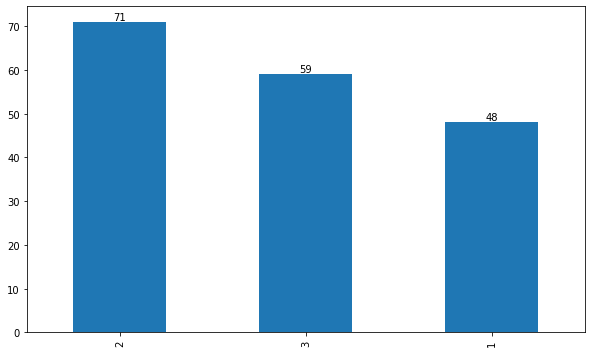

In [9]:
ax = df.Customer_Segment.value_counts().plot.bar()
ax.bar_label(ax.containers[0]);

In [10]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,2.061798
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


<AxesSubplot:>

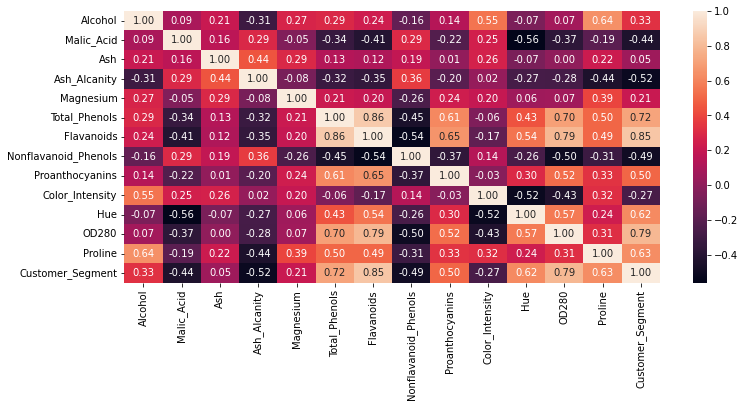

In [11]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(), annot = True, fmt=".2f")

In [ ]:
#cok ciddi multicorr sorunu gözükmüyor, birbiriyle corr u yüksek ve anlamli olanlar tek bir birlesen altinda birlesecek
#featurelerin kendi arasinda corr dan bilesenler olusuyor arka planda

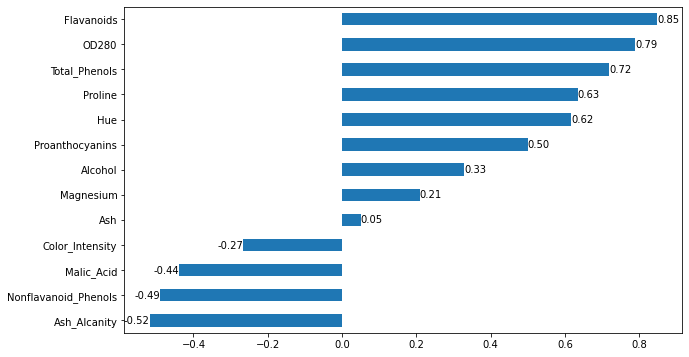

In [12]:
ax = df.corr()["Customer_Segment"][:-1].sort_values().plot(kind="barh")
ax.bar_label(ax.containers[0], fmt="%.2f"); #target in diger bilesenlerle olan katkisi

In [ ]:
#malic asit kalitesi saraplarda artmis

In [13]:
df.isnull().sum().any()

False

## Split the Data

In [14]:
X = df.drop("Customer_Segment", axis = 1)

In [15]:
y = df["Customer_Segment"]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 0)

## Modeling with Random Forest

In [17]:
from sklearn.metrics import confusion_matrix, classification_report

In [18]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
classifier = RandomForestClassifier(random_state = 0)
classifier.fit(X_train, y_train)
eval_metric(classifier, X_train, y_train, X_test, y_test)

Test_Set
[[10  0  0]
 [ 0 14  0]
 [ 0  1 11]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.93      1.00      0.97        14
           3       1.00      0.92      0.96        12

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36


Train_Set
[[38  0  0]
 [ 0 57  0]
 [ 0  0 47]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        57
           3       1.00      1.00      1.00        47

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142



In [21]:
from sklearn.model_selection import cross_validate

model = RandomForestClassifier(random_state = 0)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision_micro','recall_micro','f1_micro'], 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.985714
train_accuracy           1.000000
test_precision_micro     0.985714
train_precision_micro    1.000000
test_recall_micro        0.985714
train_recall_micro       1.000000
test_f1_micro            0.985714
train_f1_micro           1.000000
dtype: float64

In [22]:
classifier.feature_importances_

array([0.09118767, 0.03337355, 0.01428735, 0.04553722, 0.02403198,
       0.04182253, 0.18429102, 0.01254126, 0.03013279, 0.15017738,
       0.06761653, 0.09590212, 0.20909858])

In [23]:
X.head()   #make column importance kullanilmadigi icin indexlerin yeri ayni

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [24]:
feats = pd.DataFrame(index=X.columns, data= classifier.feature_importances_, 
                     columns=['Importance'])
imp_feats = feats.sort_values("Importance")
imp_feats

,Importance
Nonflavanoid_Phenols,0.012541
Ash,0.014287
Magnesium,0.024032
Proanthocyanins,0.030133
Malic_Acid,0.033374
Total_Phenols,0.041823
Ash_Alcanity,0.045537
Hue,0.067617
Alcohol,0.091188
OD280,0.095902


In [ ]:
#ilk 3 feature % 55 bilgiyi elinde tutuyor

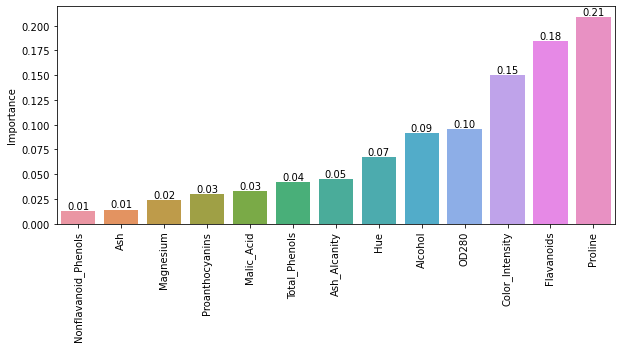

In [26]:
plt.figure(figsize=(10,4))
ax = sns.barplot(data=imp_feats.sort_values('Importance'), x=imp_feats.sort_values('Importance').index, y='Importance')
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0], fmt="%.2f");

## Remodelling by feature importance

In [27]:
X2 = df[["Proline", "Color_Intensity", "Flavanoids"]]

In [28]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size = 0.2, stratify=y, random_state = 0)

In [29]:
classifier2 = RandomForestClassifier(random_state = 0)
classifier2.fit(X_train2, y_train2)
eval_metric(classifier2, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[ 9  1  0]
 [ 0 14  0]
 [ 0  1 11]]
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        10
           2       0.88      1.00      0.93        14
           3       1.00      0.92      0.96        12

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36


Train_Set
[[38  0  0]
 [ 0 57  0]
 [ 0  0 47]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        57
           3       1.00      1.00      1.00        47

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142



In [ ]:
#ilave 1 hata geldi, 3 feature secince neredeyse ayni sonucu elde ettik
#güclü featureler varsa iyi sonuc elde edilebilir

In [30]:
model = RandomForestClassifier(random_state = 0)

scores = cross_validate(model, X_train2, y_train2, scoring = ['accuracy', 'precision_micro','recall_micro','f1_micro'], 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.992857
train_accuracy           1.000000
test_precision_micro     0.992857
train_precision_micro    1.000000
test_recall_micro        0.992857
train_recall_micro       1.000000
test_f1_micro            0.992857
train_f1_micro           1.000000
dtype: float64

## PCA

## Scaling Data

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#x trai ve x testi ayri ayri scaleliyoruz, data linkage in önüne gecmek icin, train e fittransform teste transform uygulaniyor

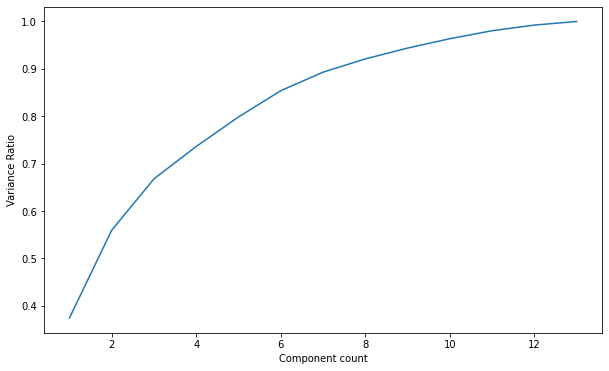

In [34]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train_scaled)
x = range(1,14)
plt.plot(x, pca.explained_variance_ratio_.cumsum())
plt.xlabel("Component count")
plt.ylabel("Variance Ratio");

In [35]:
pca = PCA(n_components=13).fit(X_train_scaled)

In [36]:
my_dict = {"explained_variance":pca.explained_variance_, 
           "explained_variance_ratio":pca.explained_variance_ratio_,
           "cumsum_explained_variance_ratio":pca.explained_variance_ratio_.cumsum()}

In [37]:
df_ev = pd.DataFrame(my_dict, index = range(1,14))
df_ev

,explained_variance,explained_variance_ratio,cumsum_explained_variance_ratio
1,4.900353,0.374296,0.374296
2,2.425735,0.185281,0.559577
3,1.418460,0.108344,0.667921
4,0.895242,0.068380,0.736300
5,0.815036,0.062254,0.798554
6,0.724387,0.055330,0.853884
7,0.512169,0.039120,0.893004
8,0.366809,0.028017,0.921021
9,0.298387,0.022791,0.943812
10,0.260014,0.019860,0.963673


In [38]:
df_ev.explained_variance.sum()

13.092198581560288

In [39]:
pca = PCA(n_components = 3) # 0.75  #3 bileseni aliyoruz, linear ve güclü featureler var diye
#n_compenet e 0.75 deseydik de ayni bilgiye ulasirdik, 0 ile 1 arasinda olmali

In [40]:
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)  

In [41]:
df_pca_train = pd.DataFrame(X_train_pca)
df_pca_train = df_pca_train.rename(columns={0:"first_component", 1:"second_component", 2:"third_component"})
df_pca_train.head()

,first_component,second_component,third_component
0,-0.322303,0.499076,1.642651
1,-2.752398,-0.684364,0.822388
2,-0.050845,2.055769,0.801012
3,2.840375,-1.312747,-0.476727
4,-0.720359,2.705395,-0.760566


In [42]:
df_pca_test=pd.DataFrame(X_test_pca)
df_pca_test = df_pca_test.rename(columns={0:"first_component", 1:"second_component", 2:"third_component"})
df_pca_test.head()

,first_component,second_component,third_component
0,-0.489767,2.337936,1.178843
1,-2.228090,-2.702401,0.584823
2,-1.218574,0.605429,1.887888
3,-2.212360,-2.625781,1.584889
4,-0.535533,1.899966,1.252930


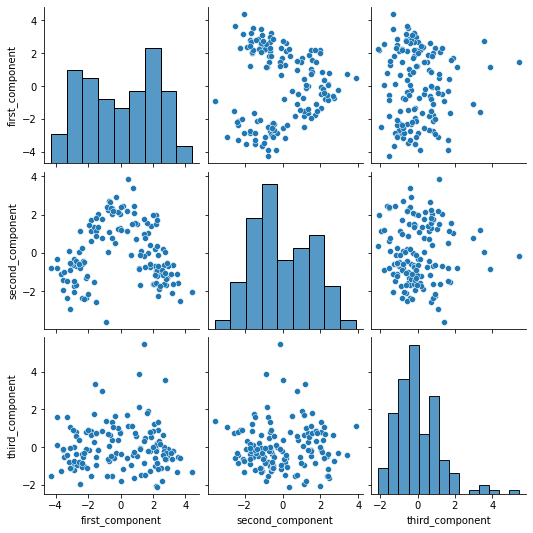

In [43]:
sns.pairplot(df_pca_train)

In [ ]:
#aralarinda corr olmadigini gördük

In [44]:
df_pca_train.corr().round()

,first_component,second_component,third_component
first_component,1.0,-0.0,-0.0
second_component,-0.0,1.0,-0.0
third_component,-0.0,-0.0,1.0


## Modelling after PCA

In [ ]:
#modeli tekrar kurduk, max_depth =2 aldik, full cekmesi istemiyorsak train setine hata katiyoruz

In [45]:
classifier3 = RandomForestClassifier(random_state = 0, max_depth=2)
classifier3.fit(X_train_pca, y_train)
eval_metric(classifier3, X_train_pca, y_train, X_test_pca, y_test)

Test_Set
[[ 9  0  1]
 [ 0 13  1]
 [ 0  1 11]]
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        10
           2       0.93      0.93      0.93        14
           3       0.85      0.92      0.88        12

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36


Train_Set
[[38  0  0]
 [ 1 53  3]
 [ 0  1 46]]
              precision    recall  f1-score   support

           1       0.97      1.00      0.99        38
           2       0.98      0.93      0.95        57
           3       0.94      0.98      0.96        47

    accuracy                           0.96       142
   macro avg       0.96      0.97      0.97       142
weighted avg       0.97      0.96      0.96       142



In [46]:
from sklearn.pipeline import Pipeline

In [48]:
operations = [("scaler", StandardScaler()), ("PCA",PCA(n_components=3)),
              ("RF", RandomForestClassifier(random_state = 0, max_depth=2))]

pipe_model = Pipeline(steps=operations)
                                             
scores = cross_validate(pipe_model, X_train, y_train, scoring = ['accuracy', 'precision_micro','recall_micro','f1_micro'], 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]                                            

test_accuracy            0.957143
train_accuracy           0.969488
test_precision_micro     0.957143
train_precision_micro    0.969488
test_recall_micro        0.957143
train_recall_micro       0.969488
test_f1_micro            0.957143
train_f1_micro           0.969488
dtype: float64

In [ ]:
#train setini full cekmesi burada ortadan kaldirilmis  oldu

## Interpreting PCA results

In [ ]:
#yorumlamayi train seti üzerinden yapacagiz

In [47]:
df_pca_train.head()

,first_component,second_component,third_component
0,-0.322303,0.499076,1.642651
1,-2.752398,-0.684364,0.822388
2,-0.050845,2.055769,0.801012
3,2.840375,-1.312747,-0.476727
4,-0.720359,2.705395,-0.760566


In [49]:
scaled_X_train = pd.DataFrame(X_train_scaled, columns = X_train.columns)
scaled_X_train.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,-1.468001,-0.169849,1.403224,0.593458,2.508377,-1.071939,-1.004947,-1.868580,-0.014400,-1.140631,0.006175,-0.509987,-0.408074
1,-0.215361,0.855905,0.807090,0.742981,0.489489,-0.993904,-1.387317,1.827836,-1.129742,0.253474,-0.355431,-0.727589,-0.585133
2,-0.733280,-0.624749,-0.645987,0.892503,0.633695,-0.447658,0.073533,-0.261443,0.078545,-1.339789,0.503384,0.505492,-1.309465
3,1.434751,-0.544473,-0.236145,-0.961579,1.354727,1.425185,0.965730,-0.904298,0.859284,0.615579,-0.039026,1.013231,0.702568
4,-1.455957,-0.526634,-1.800996,-0.004633,-0.952574,0.332693,-0.367664,-0.020372,-0.274646,-1.339789,-0.039026,-0.248864,-1.084117


In [50]:
combined_df = pd.concat([df_pca_train, scaled_X_train], axis=1)
correlation = combined_df.corr()
correlation.head()

,first_component,second_component,third_component,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
first_component,1.000000e+00,-7.285283e-17,-5.973087e-19,0.330918,-0.544282,0.033205,-0.518515,0.403014,0.853299,0.913672,-0.685830,0.676137,-0.144932,0.667693,0.812251,0.640861
second_component,-7.285283e-17,1.000000e+00,-2.001440e-16,-0.760028,-0.336791,-0.528035,0.068361,-0.397660,-0.109147,0.029597,-0.094578,0.013603,-0.840922,0.396268,0.295055,-0.550273
third_component,-5.973087e-19,-2.001440e-16,1.000000e+00,-0.254048,0.052492,0.723413,0.738878,0.254166,0.181515,0.171593,0.161036,0.194709,-0.136665,0.043360,0.142840,-0.200275
Alcohol,3.309181e-01,-7.600283e-01,-2.540481e-01,1.000000,0.101084,0.242167,-0.343187,0.252779,0.296767,0.239891,-0.164944,0.122043,0.543056,-0.006869,0.079714,0.619360
Malic_Acid,-5.442825e-01,-3.367906e-01,5.249185e-02,0.101084,1.000000,0.120032,0.264928,-0.106263,-0.353586,-0.433956,0.329713,-0.295337,0.189747,-0.557397,-0.383362,-0.197038


In [ ]:
#satirlardan ilk 3 ünü al, featurelerden ilk 3 ünü alma diyoruz
#feature importance da en önemli feature olan proline burda 0.64 cikmis
#flavanoids in cok ciddi katkisi var, bunlar kaliteli sarap in belirlenmesinde önemli component 1.si
#kalitesiz saraplarda renk hassasiyetinde artis var, 
# 2. ve 3. component kalitesiz saraplarin tespitinde önemli olan featurelerin yogun sekilde toplandigi featurelerin bileseni
#datamda en fazla bilgi 1 de, 2 ve 3 arti katki sagliyor ilk bilesene
#benzer classlarin featureleri ayni bilesen icinde toplayabiliriz

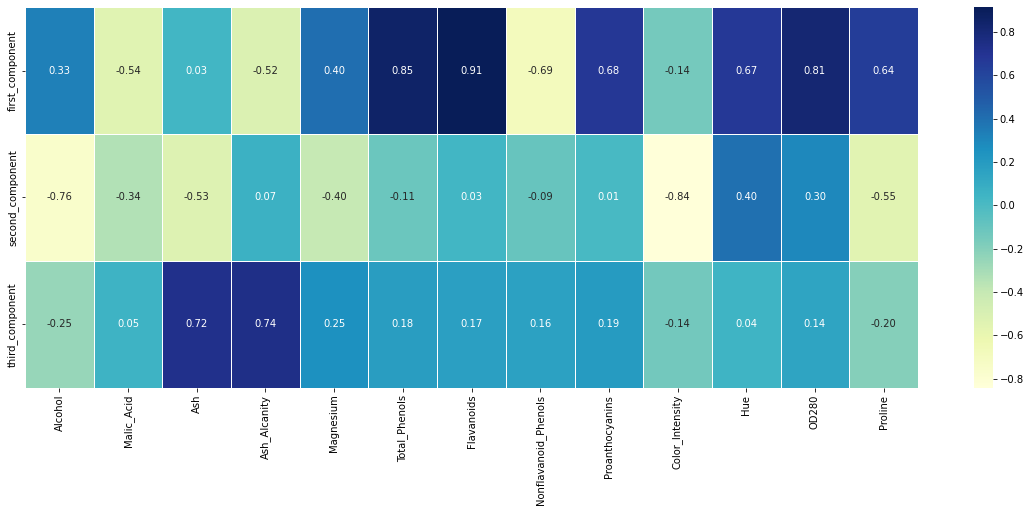

In [51]:
fig, ax = plt.subplots(figsize=(20, 7))
sns.heatmap(correlation.iloc[:3,3:], cmap='YlGnBu', linewidths=.7, annot=True, fmt='.2f')
plt.show()

<AxesSubplot:>

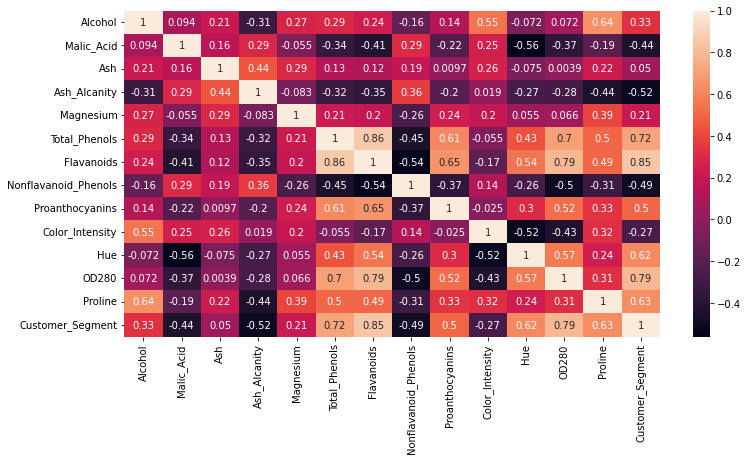

In [52]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot = True)

In [53]:
import plotly.express as px
fig = px.scatter_3d(x=df_pca_train["first_component"], y=df_pca_train["second_component"], 
                    z=df_pca_train["third_component"], color=y_train) #y_train yani gercek deger üzerinden görsellestirdim
fig.show()
#bu 3 boyutlu görsel ama 14 featureyi temsil ediyor